# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## APCOMP 209a Final Project

**Harvard University**<br/>
**Fall 2023**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader<br/>
**Group Members**: Davide Bray, Regina Lin, Shang Wang, Susannah Su

<hr style="height:2.4pt">

### Import Libraries

In [1]:
import pandas as pd
import re
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## Data description

(From Kaggle, see https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv)

 There are in total 5 datasets: `2014_Financial_Data.csv`, `2015_Financial_Data.csv`, `2016_Financial_Data.csv`, `2017_Financial_Data.csv`, `2018_Financial_Data.csv`.

Each dataset contains 200+ financial indicators, that are commonly found in the 10-K filings each publicly traded company releases yearly, for a plethora of US stocks (on average, 4k stocks are listed in each dataset). 

The dataset was built by the author leveraging Financial Modeling Prep API and pandas_datareader.

#### Important remarks regarding the datasets
1. Some financial indicator values are missing (`nan` cells), so the user can select the best technique to clean each dataset (`dropna`, `fillna`, etc.).
2. There are outliers, meaning extreme values that are probably caused by mistypings. Also in this case, the user can choose how to clean each dataset (have a look at the 1% - 99% percentile values).
3. The third-to-last column, `Sector`, lists the sector of each stock. Indeed, in the US stock market each company is part of a sector that classifies it in a macro-area. Since all the sectors have been collected (Basic Materials, Communication Services, Consumer Cyclical, Consumer Defensive, Energy, Financial Services, Healthcare, Industrial, Real Estate, Technology and Utilities), the user has the option to perform per-sector analyses and comparisons.
4. The second-to-last column, `PRICE VAR [%]`, lists the percent price variation of each stock for the year. For example, if we consider the dataset `2015_Financial_Data.csv`, we will have:
    - 200+ financial indicators for the year 2015;
    - percent price variation for the year 2016 (meaning from the first trading day on Jan 2016 to the last trading day on Dec 2016).

5. The last column, `class`, lists a binary classification for each stock, where
    - for each stock, if the `PRICE VAR [%]` value is positive, `class = 1`. From a trading perspective, the `1` identifies those stocks that an hypothetical trader should **BUY** at the start of the year and sell at the end of the year for a profit.
    - for each stock, if the `PRICE VAR [%]` value is negative, `class = 0`. From a trading perspective, the `0` identifies those stocks that an hypothetical trader should **NOT BUY**, since their value will decrease, meaning a loss of capital.

The columns `PRICE VAR [%]` and `class` make possible to use the datasets for both classification and regression tasks:
- If the we wish to train a machine learning model so that it learns to classify those stocks that in buy-worthy and not buy-worthy, it is possible to get the targets from the class column;
- If the we wish to train a machine learning model so that it learns to predict the future value of a stock, it is possible to get the targets from the `PRICE VAR [%]` column.

## Problem Statement

This project seeks to develop a machine learning model that predicts stock price variations using a range of financial indicators, without relying on individual stock identifiers (tickers). The aim is to uncover general patterns in the stock market that transcend company-specific characteristics, thereby creating a broadly applicable predictive tool. The challenge involves accurately capturing the complex dynamics of the market using available financial data, and ensuring that the model is robust and generalizable across various stocks and market conditions.

The project will begin with a simple baseline model, then advance to more sophisticated algorithms to improve prediction accuracy. Success will be measured by the model's ability to reliably predict stock price changes, providing a valuable asset for investors and analysts in making informed financial decisions. This endeavor is poised to enhance understanding and forecasting of market behaviors using machine learning techniques.

## Project Organization

### Part 0: Data Preprocessing & Feature Selection / Exploratory Data Analysis

#### Overview
This foundational part focuses on preparing the dataset for various analyses and model building in the subsequent parts. The processes conducted here are crucial for ensuring the quality and effectiveness of the models and analyses.

#### Methodology
1. **Basic Processing**
* Load the dataset and rename the columns for clarity.
* Separate predictors and target variables (`price_var20xx`, `class20xx`, `xx` correspond to the year).
* Preselection of predictors based on industry knowledge and relevance.
* Train-test splitting first to prevent data leakage.
* Scaling of features to normalize data.

2. **EDA**
* Statistical summary of datasets to understand distributions and central tendencies.
* Visualization of data distributions and relationships (e.g., histograms, scatter plots).
* Correlation analysis to identify highly correlated features.
* Identification of trends and patterns specific to sectors.

3. **Handle Missingness**
* Examine nullness.
* K-NN imputation to handle missing values without making assumptions about the underlying distribution of the variables.

4. **Dimentionality Reduction**
* Apply principle component analysis (PCA) to reduce dimentionality.

### Part 1: Baseline Model Selection and Evaluation

#### Objective 
To establish a simple yet effective baseline model for predicting stock performance.

#### Methodology
1. **Model Selection and Building**
* Start with a simple mean/median model as a baseline.
    - Mean/median prediction model
    - Multiple linear regression
    - Single decision tree
* Train the model on our dataset and perform an initial evaluation using $MSE$.

2. **Cross Validations**
* Implement basic cross-validation (like k-fold CV) to assess the model’s performance more reliably.

3. **Interim Interpretation**
* Provide an initial interpretation of the model's performance, focusing on its strengths and limitations based on the evaluation metrics.
* Select the baseline model.

### Part 2: More Complex Models

#### Objective 
The objective of this stage is to explore and evaluate more sophisticated machine learning models beyond the baseline model. These models are expected to capture complex patterns and relationships in the data that the baseline model might miss. The goal is to improve prediction accuracy and reliability in forecasting stock performance, while also gaining deeper insights into how different financial indicators influence stock prices.

#### Methodology
1. **Selection of More Complex Models and Building**
* Identify a set of more complex models:
    - Ridge regression
    - LASSO regression
    - Elastic net regression
    - Random forest regressors
    - Gradient boosting
* Train the model on our dataset and perform an initial evaluation using $MSE$.

2. **Cross Validations**
* Implement basic cross-validation (like k-fold CV) to assess the model’s performance more reliably.
* Include a basic hyperparameter tuning to find a reasonably good configuration for each model, while avoiding extensive optimization at this stage.

3. **Performance Evaluation and Final Model Selection**
* Evaluate the tuned models using $MSE$.
* Compare the complex models with the baseline model.
* Select the final model.

### Part 3: Network Analysis of Stock Market Interdependencies

#### Objective
Analyze the network of interdependencies among stocks or sectors.

#### Methodology
1. **Network Construction**
* Construct a network graph based on the relationships derived from the preprocessed data.

2. **Network Analysis**
* Centrality measures to identify influential stocks.
* Community detection to find clusters of interrelated stocks.
* Dynamic analysis over different years to observe changes.

3. **Evaluation**
* Evaluate the network’s insights on stock market dynamics.

## Part 0: Data Preprocessing & Feature Selection / Exploratory Data Analysis

### Basic Processing

In [2]:
# Load raw data
df2014 = pd.read_csv('data/2014_Financial_Data.csv')
df2015 = pd.read_csv('data/2015_Financial_Data.csv')
df2016 = pd.read_csv('data/2016_Financial_Data.csv')
df2017 = pd.read_csv('data/2017_Financial_Data.csv')
df2018 = pd.read_csv('data/2018_Financial_Data.csv')

In [3]:
# Inspect how does it look like -- 
# The "Unnamed: 0" column is probably stock ticker
df2014.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per S

In [4]:
# Check that the df of different years all have same columns
# They do (except the 2nd to last column which is our predictor) -- they all have 225 coloumns
print(df2014.columns, '\n')
print(df2015.columns, '\n')
print(df2016.columns, '\n')
print(df2017.columns, '\n')
print(df2018.columns, '\n')

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2015 PRICE VAR [%]', 'Class'],
      dtype='object', length=225) 

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2016 PRICE VAR [%]', 'Class'],
      dtype='object', length=225) 

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R

In [5]:
# Rename the only different column names before we concatenate the dataframes

df2014.rename(columns={'2015 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)
df2015.rename(columns={'2016 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)
df2016.rename(columns={'2017 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)
df2017.rename(columns={'2018 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)
df2018.rename(columns={'2019 PRICE VAR [%]': 'price_var_next_yr_%'}, inplace=True)

In [6]:
# Add a new column indicating year

df2014.insert(0, 'year', '2014')
df2015.insert(0, 'year', '2015')
df2016.insert(0, 'year', '2016')
df2017.insert(0, 'year', '2017')
df2018.insert(0, 'year', '2018')

In [7]:
# Concatenating dataframes vertically
df = pd.concat([df2014, df2015, df2016, df2017, df2018], axis=0)
df = df.reset_index(drop=True)

In [8]:
df.tail()

,year,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (

In [9]:
df = df.drop(columns=['Unnamed: 0', 'Class'])

In [10]:
# Function to convert camel case to snake case and handle pre-existing underscores
def camel_to_snake(name):
    # Insert an underscore between lowercase followed by uppercase
    s1 = re.sub('([a-z])([A-Z])', r'\1_\2', name)
    # Handle pre-existing underscores (avoid double underscores)
    s2 = re.sub('_+', '_', s1)
    return s2.lower()

In [11]:
# Then convert any camelCase to snake_case
df.columns = [camel_to_snake(col) for col in df.columns]

In [12]:
# Renaming columns to follow industry practice
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

In [13]:
df.head()

,year,revenue,revenue_growth,cost_of_revenue,gross_profit,r&d_expenses,sg&a_expense,operating_expenses,operating_income,interest_expense,earnings_before_tax,income_tax_expense,net_income_-_non-controlling_int,net_income_-_discontinued_ops,net_income,preferred_dividends,net_income_com,eps,eps_diluted,weighted_average_shs_out,weighted_average_shs_out_(dil),dividend_per_share,gross_margin,ebitda_margin,ebit_margin,profit_margin,free_cash_flow_margin,ebitda,ebit,consolidated_income,earnings_before_tax_margin,net_profit_margin,cash_and_cash_equivalents,short-term_investments,cash_and_short-term_investments,receivables,inventories,total_current_assets,"property,_plant_&_equipment_net",goodwill_and_intangible_assets,long-term_investments,tax_assets,total_non-current_assets,total_assets,payables,short-term_debt,total_current_liabilities,long-term_debt,total_debt,deferred_revenue,tax_liabilities,deposit_liabilities,total_non-current_liabilities,total_liabilities,other_comprehensive_income,retained_earnings_(deficit),total_shareholders_equity,investments,net_debt,other_assets,other_liabilities,depreciation_&_amortization,stock-based_compensation,operating_cash_flow,capital_expenditure,acquisitions_and_disposals,investment_purchases_and_sales,investing_cash_flow,issuance_(repayment)_of_debt,issuance_(buybacks)_of_shares,dividend_payments,financing_cash_flow,effect_of_forex_changes_on_cash,net_cash_flow_/_change_in_cash,free_cash_flow,net_cash/marketcap,price_book_value_ratio,price_to_book_ratio,price_to_sales_ratio,price_earnings_ratio,price_to_free_cash_flows_ratio,price_to_operating_cash_flows_ratio,price_cash_flow_ratio,price_earnings_to_growth_ratio,price_sales_ratio,dividend_yield,enterprise_value_multiple,price_fair_value,ebitper_revenue,ebtper_ebit,niper_ebt,gross_profit_margin,operating_profit_margin,pretax_profit_margin,net_profit_margin,effective_tax_rate,return_on_assets,return_on_equity,return_on_capital_employed,n_iper_ebt,e_btper_ebit,e_bitper_revenue,payables_turnover,inventory_turnover,fixed_asset_turnover,asset_turnover,current_ratio,quick_ratio,cash_ratio,days_of_sales_outstanding,days_of_inventory_outstanding,operating_cycle,days_of_payables_outstanding,cash_conversion_cycle,debt_ratio,debt_equity_ratio,longterm_debt_to_capitalization,total_debt_to_capitalization,interest_coverage,cash_flow_to_debt_ratio,company_equity_multiplier,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,payout_ratio,operating_cash_flow_sales_ratio,free_cash_flow_operating_cash_flow_ratio,cash_flow_coverage_ratios,short_term_coverage_ratios,capital_expenditure_coverage_ratios,dividendpaid_and_capex_coverage_ratios,dividend_payout_ratio,revenue_per_share,net_income_per_share,operating_cash_flow_per_share,free_cash_flow_per_share,cash_per_share,book_value_per_share,tangible_book_value_per_share,shareholders_equity_per_share,interest_debt_per_share,market_cap,enterprise_value,pe_ratio,price_to_sales_ratio,pocf_ratio,pfcf_ratio,pb_ratio,ptb_ratio,ev_to_sales,enterprise_value_over_ebitda,ev_to_operating_cash_flow,ev_to_free_cash_flow,earnings_yield,free_cash_flow_yield,debt_to_equity,debt_to_assets,net_debt_to_ebitda,current_ratio,interest_coverage,income_quality,dividend_yield,payout_ratio,sg&a_to_revenue,r&d_to_revenue,intangibles_to_total_assets,capex_to_operating_cash_flow,capex_to_revenue,capex_to_depreciation,stock-based_compensation_to_revenue,graham_number,roic,return_on_tangible_assets,graham_net-net,working_capital,tangible_asset_value,net_current_asset_value,invested_capital,average_receivables,average_payables,average_inventory,days_sales_outstanding,days_payables_outstanding,days_of_inventory_on_hand,receivables_turnover,payables_turnover,inventory_turnover,roe,capex_per_share,gross_profit_growth,ebit_growth,operating_income_growth,net_income_growth,eps_growth,eps_diluted_growth,weighted_average_shares_growth,weighted_average_shares_diluted_growth,dividends_per_share_growth,operating_cash_flow_growth,free_cash_flow_g

In [14]:
df.shape

(22077, 224)

### An informative description of Predictors and Targets

From investopidia: https://www.investopedia.com/articles/basics/04/100804.asp

Stock prices are ultimately determined by supply and demand, which are influenced by both fundamental and technical factors.

#### Fundamental factors

Fundamental factors relate to a company's financial performance, especially earnings. The earnings per share (EPS) represents the owner's proportional share of earnings. The P/E ratio expresses the valuation multiple, i.e. how much an investor is willing to pay for those future earnings. Earnings can also be measured by cash flow per share or dividends per share. The valuation multiple depends on the expected earnings growth rate and the discount rate, which represents inflation and the perceived riskiness of the stock. Higher expected growth leads to a higher multiple, while higher risk or inflation leads to a lower multiple.

#### Technical factors

Technical factors are from external market conditions that drive supply and demand. Historically, low inflation boosts multiples while high inflation lowers them. Deflation hurts pricing power. Stocks tend to move with the overall market and their industry peers, and stocks compete with other asset classes like bonds and commodities. Regarding investors, middle-aged investors tend to invest more in stocks. Furthermore, stocks build momentum or revert to the mean. Large cap stocks have high liquidity while small caps often have a liquidity discount. Finally, unforeseen positive or negative events impact sentiment, and psychology often weighs more heavily than fundamentals in the short term. Behavioral finance aims to explain irrational market behavior.

#### Reconciliation

While technicals often dominate in the short run, fundamentals determine long-term prices. Different investors weigh the factors differently, but both play a critical role in the complicated dynamics of supply, demand, and human psychology. We decide to have the following categories of predictors and cross-check and see if our datasets include them:

**Fundamentals**
* Earnings Per Share (EPS) and Diluted EPS: Directly related to earnings power
* Revenue, Net Income, Gross Profit, Operating Income, Earnings Before Tax: Critical components of earnings base
* Revenue Growth, EPS Growth, Net Income Growth: Reflect expected earnings growth
* P/E Ratio, P/S Ratio, P/B Ratio, Dividend Yield: Valuation multiples based on earnings
* Dividends Per Share: Important for mature dividend-paying companies

**Technical Factors**
* Market Capitalization: Relates to liquidity and size
* Trading Volume: Reflects liquidity and investor interest
* Total Debt, Long Term Debt, Debt-to-Equity, Net Debt to EBITDA: Influence risk profile and cost of capital
* Operating Cash Flow, Free Cash Flow, Capital Expenditures, Cash & Cash Equivalents: Reflect ability to generate cash

**Market Sentiment**
* EV/EBITDA, EV/Sales, Earnings Yield, FCF Yield: May capture some market sentiment
* General Financial Health: Current Ratio, Quick Ratio: Assess short-term liquidity
* Net Profit Margin, ROA, ROE: Show how efficiently company is run
* Asset Turnover, Inventory Turnover, Receivables Turnover: Reflect asset utilization
* Total Assets, Total Liabilities, Total Debt, Net Debt: consolidated metrics

**Sector Information**
* Sector: Captures industry-specific effects

### An analysis of Missingness

In [15]:
# Check the percentage of missing data in each column
missing = df.isnull().mean() * 100
print(missing)

year                                          0.0000
revenue                                       5.3042
revenue_growth                                9.4578
cost_of_revenue                               8.0219
gross_profit                                  5.4672
r&d_expenses                                  9.6843
sg&a_expense                                  7.5599
operating_expenses                            7.7094
operating_income                              4.9871
interest_expense                              7.7864
earnings_before_tax                           6.1784
income_tax_expense                            7.1930
net_income_-_non-controlling_int             10.2324
net_income_-_discontinued_ops                10.2324
net_income                                    7.0888
preferred_dividends                          10.2324
net_income_com                                6.3007
eps                                           5.8930
eps_diluted                                   

Our first intervention will consist of dropping all the predictors with more than 10% of missing values. This strategy allows us to avoid excessive imputation, which would introduce a bias.

In [16]:
# Drop columns where the number of non-missing values is less than 90% of the number of rows
df_dropped = df.dropna(axis=1, thresh=int(0.9*df.shape[0]))

In [17]:
df_dropped.shape

(22077, 73)

In [18]:
# Separate predictors and response variable + One-Hot encode 'sector'
X = df_dropped.drop(columns=['price_var_next_yr_%'])
X = pd.get_dummies(X, drop_first=True)
y = df_dropped['price_var_next_yr_%']

In [19]:
X.head()

,revenue,revenue_growth,cost_of_revenue,gross_profit,r&d_expenses,sg&a_expense,operating_expenses,operating_income,interest_expense,earnings_before_tax,income_tax_expense,net_income,net_income_com,eps,eps_diluted,weighted_average_shs_out,weighted_average_shs_out_(dil),gross_margin,ebit_margin,ebitda,ebit,consolidated_income,earnings_before_tax_margin,net_profit_margin,cash_and_cash_equivalents,receivables,inventories,"property,_plant_&_equipment_net",goodwill_and_intangible_assets,tax_assets,total_assets,payables,long-term_debt,total_debt,deferred_revenue,tax_liabilities,total_liabilities,other_comprehensive_income,retained_earnings_(deficit),total_shareholders_equity,investments,depreciation_&_amortization,stock-based_compensation,operating_cash_flow,capital_expenditure,acquisitions_and_disposals,investment_purchases_and_sales,investing_cash_flow,issuance_(repayment)_of_debt,issuance_(buybacks)_of_shares,dividend_payments,financing_cash_flow,effect_of_forex_changes_on_cash,net_cash_flow_/_change_in_cash,free_cash_flow,asset_turnover,days_of_inventory_outstanding,interest_coverage,interest_coverage,intangibles_to_total_assets,capex_to_operating_cash_flow,tangible_asset_value,average_receivables,days_sales_outstanding,gross_profit_growth,operating_income_growth,eps_growth,eps_diluted_growth,operating_cash_flow_growth,receivables_growth,year_2015,year_2016,year_2017,year_2018,sector_Communication Services,sector_Consumer Cyclical,sector_Consumer Defensive,sector_Energy,sector_Financial Services,sector_Healthcare,sector_Industrials,sector_Real Estate,sector_Technology,sector_Utilities
0,74401000000.0000,-0.0713,39030000000.0000,35371000000.0000,0.0000,21461000000.0000,21461000000.0000,13910000000.0000,709000000.0000,14494000000.0000,2851000000.0000,11643000000.0000,11643000000.0000,4.1900,4.0100,2705960276.0000,2705960276.0000,0.4754,0.2043,18344000000.0000,15203000000.0000,11785000000.0000,0.1948,0.1565,8558000000.0000,6386000000.0000,6759000000.0000,22304000000.0000,84547000000.0000,1092000000.0000,144266000000.0000,8461000000.0000,19811000000.0000,35417000000.0000,0.0000,10218000000.0000,74290000000.0000,-7662000000.0000,84990000000.0000,69976000000.0000,2128000000.0000,3141000000.0000,360000000.0000,13958000000.0000,-3848000000.0000,-24000000.0000,-805000000.0000,-4100000000.0000,3543000000.0000,-3911000000.0000,-6911000000.0000,-7279000000.0000,39000000.0000,2618000000.0000,10110000000.0000,0.5157,31.3287,21.4429,21.4429,0.5860,0.2757,59719000000.0000,6447000000.0000,31.3287,-0.1185,0.0067,0.0371,0.0389,-0.0615,-0.0187,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,3734148046.4966,1.1737,2805625443.9780,928522602.5186,108330319.6642,344141427.1876,793926703.2612,134595899.2573,12148692.2829,175382305.4569,39559573.7811,135822731.6758,135822731.6758,0.2396,0.2260,NaN,18293619.9548,0.2487,0.0502,245685824.9919,187530997.7397,121503551.8243,0.0470,0.0364,773514853.0836,11694865.9994,579319341.2980,308597513.7230,190658701.9696,37641104.2945,2736687278.0110,1000490797.5460,622374071.6823,622374071.6823,31411042.9448,0.0000,2301093477.5589,-1729254.1169,4285437.5202,412354536.6484,671378753.6325,58154827.2522,36405230.8686,526745560.2196,-263704552.7930,-192255247.0132,-212644656.1188,-686693574.4269,619326767.8398,1767839.8450,0.0000,621913626.0898,-15648692.2829,446316919.5996,263041007.4265,1.3645,1.1431,15.4363,15.4363,0.0697,0.5006,2546028576.0413,NaN,1.1431,1.2489,1.9463,1.4625,1.4646,0.2134,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,98375000000.0000,0.0182,78138000000.0000,20237000000.0000,0.0000,15196000000.0000,17512000000.0000,2725000000.0000,443000000.0000,2270000000.0000,751000000.0000,1519000000.0000,1519000000.0000,1.4700,1.4500,1033052512.0000,1028000000.0000,0.2057,0.0276,4416000000.0000,2713000000.0000,1531000000.0000,0.0231,0.0154,401000000.0000,1116000000.0000,5651000000.0000,16893000000.0000,2837000000.0000,0.0000,29281000000.0

In [20]:
y.head()

0    -9.3233
1   -25.5122
2    33.1183
3     2.7523
4    12.8977
Name: price_var_next_yr_%, dtype: float64

#### Identifying the patterns of missing data

We use the `missingno` (missing "no") library to visualize the patterns of missing data. Specifically, white cells indicate missing data.

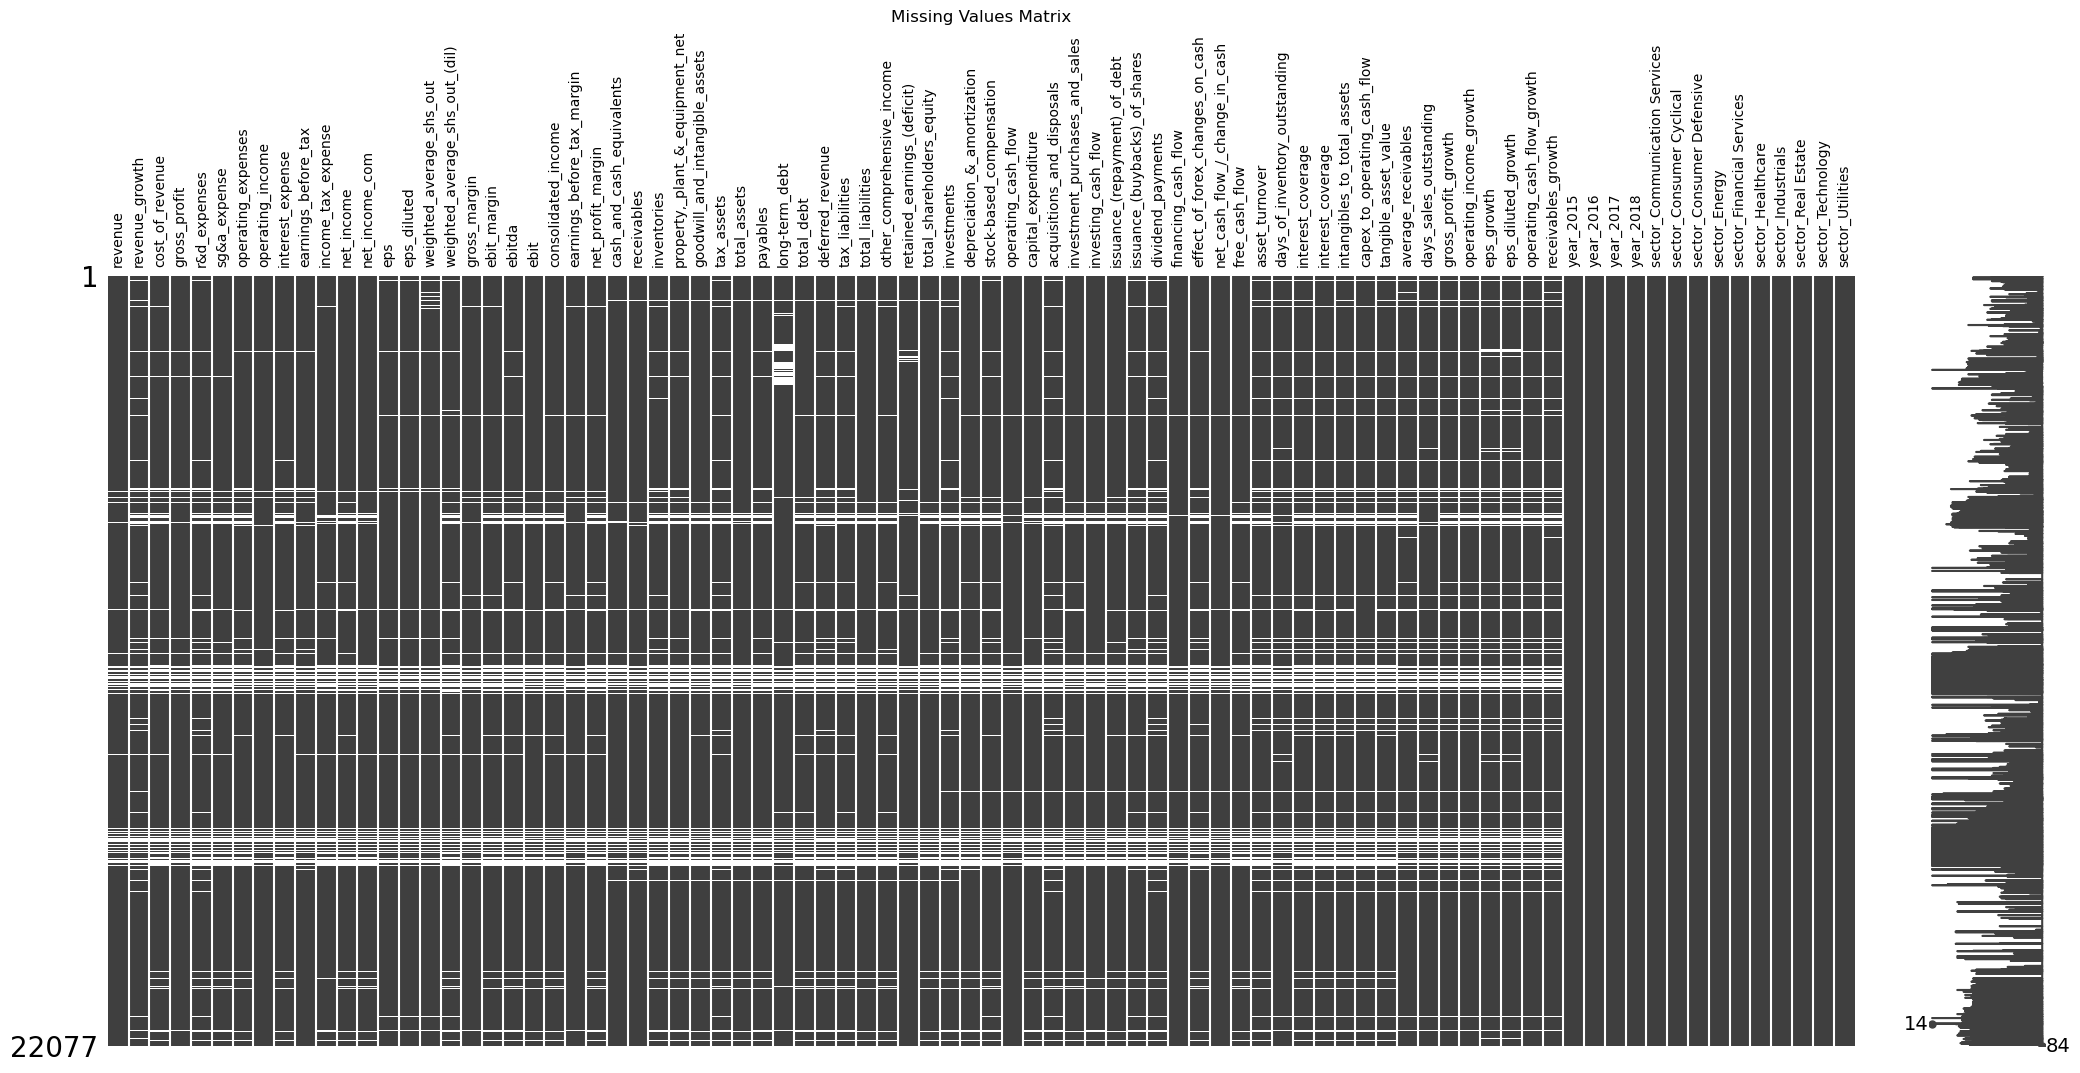

In [21]:
# Visualize the missingness pattern
msno.matrix(X)

plt.title('Missing Values Matrix')
plt.xticks(ticks=range(len(X.columns)), labels=X.columns, rotation=90)  # Set the x-axis ticks to column names
plt.show()

We now try to gain a better insight on the number of missing values by leveraging the missingno bar plot. Each horizontal bar represents each predictor's non-null values, whose number is reported aside. 

In [22]:
def non_missing_ratio_summary(df):
    """
    Calculate the ratio of non-missing (non-NA) data for each column in the DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame for which to calculate the non-missing ratios.

    Returns:
    - pandas.DataFrame: A DataFrame containing the non-missing ratios for each column.
    """
    # Calculate the total number of data points (number of rows)
    total_data_points = len(df)

    # Calculate the count of non-missing values for each column
    non_missing_counts = df.count()

    # Calculate the ratio of non-missing data points for each column
    non_missing_ratios = non_missing_counts / total_data_points

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Non_Missing_Count': non_missing_counts,
        'Non_Missing_Ratio': non_missing_ratios
    })

    return summary_df

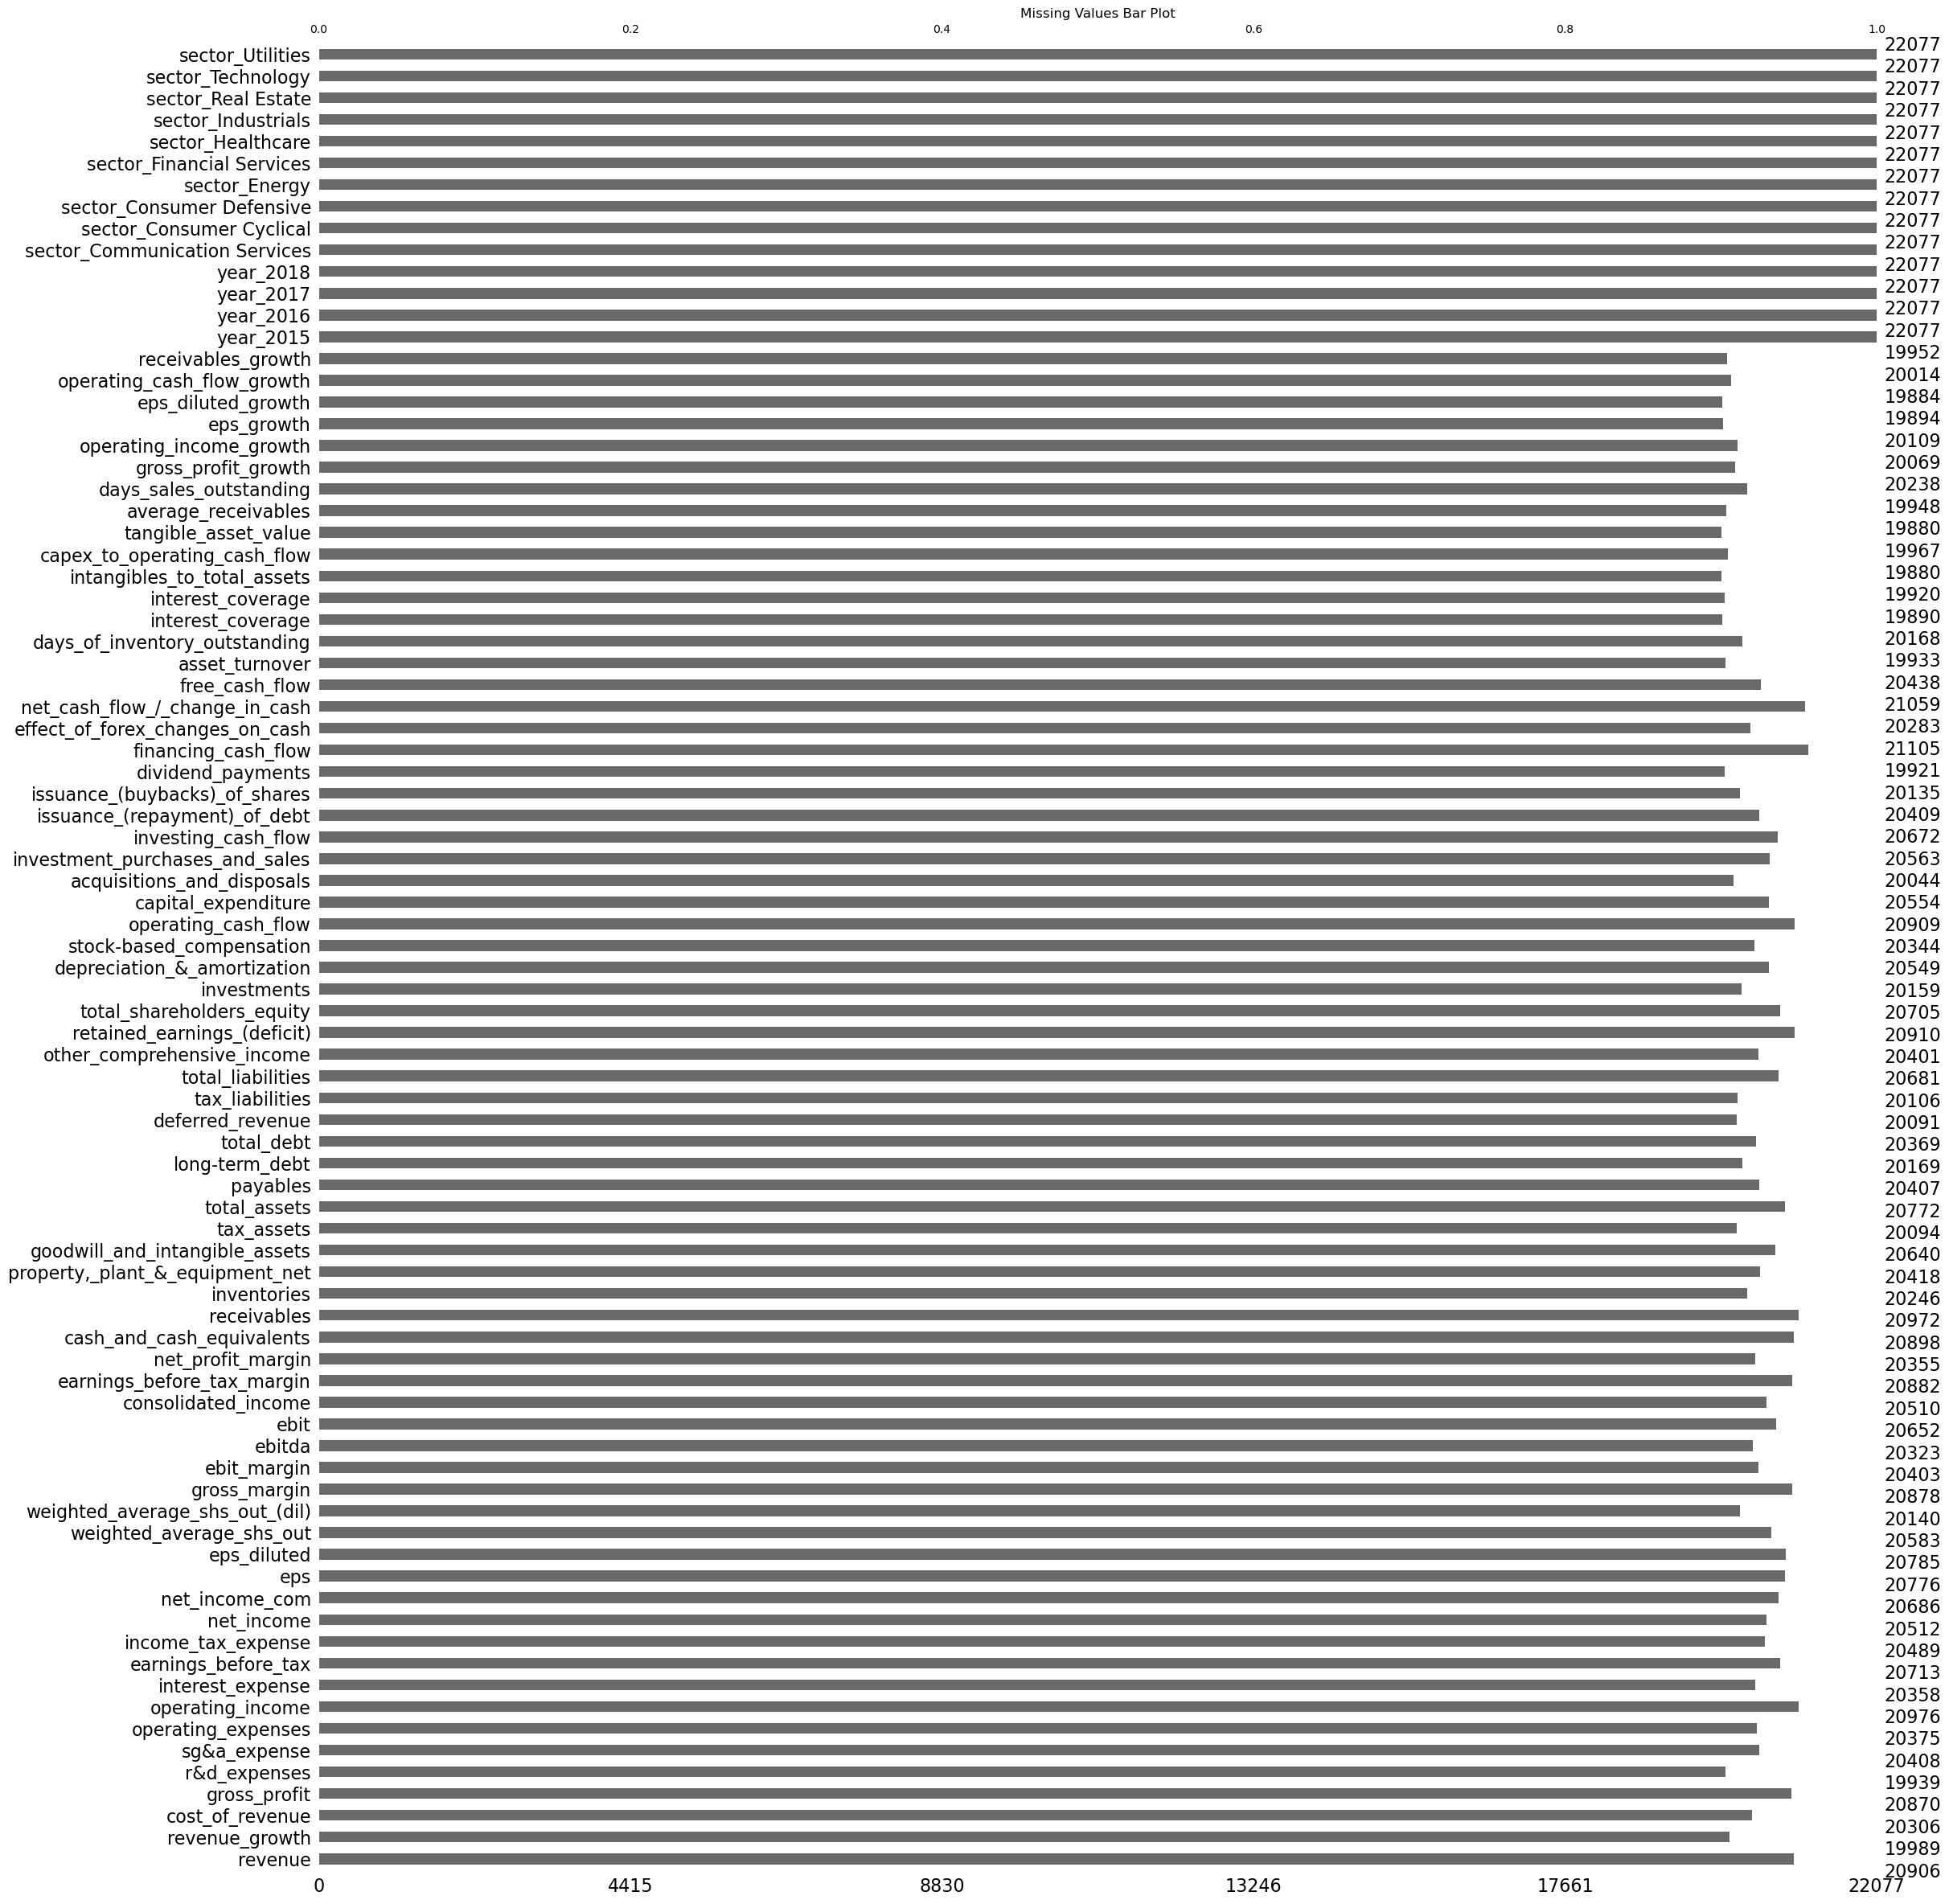

In [23]:
predictors_non_miss_summary = non_missing_ratio_summary(X)
msno.bar(X)

plt.title('Missing Values Bar Plot')
plt.show()

### Outliers drop

We now take a closer look at the outcome.

In [24]:
# Descrptive statistics of y
y.describe()

count     22077.0000
mean        269.8893
std       19346.1736
min        -100.3972
25%         -19.4741
50%           3.9091
75%          27.5057
max     2418600.9153
Name: price_var_next_yr_%, dtype: float64

We observe that y has a long tail and we proceed with dropping the outliers. We end up using the 98% of the data.

In [25]:
y.quantile(1)

2418600.915311456

In [26]:
y.quantile(0.98)

141.7316788052473

<Axes: >

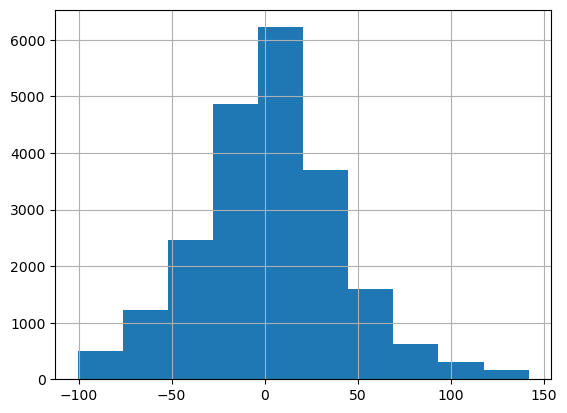

In [27]:
y[y<y.quantile(0.98)].hist()

In [28]:
indx = y < y.quantile(0.98)

In [29]:
# Only using the 98% of original data since y has a long tail
X_train, X_test, y_train, y_test = train_test_split(X[indx], y[indx], 
                                                    test_size=0.2, shuffle=True, random_state=123)